# Lasso Regression / Ridge Regression / Least-Squares Regression

Consider the following regression problem: You are given 40 data points each having 200 features and a real-valued response for each data point.

To find a good linear regressor, that explains the data well and at the same time is fairly sparse, you can use lasso regression.

You encounter such problems usually when dealing with gene expression data where you have few patients but many genes that might cause an illness.


In this programming exercise, you will compare least-squares, ridge and lasso regression, and familiarize yourself with the scikit-learn library.

The template provided in this notebook already has the least-squares and ridge regression implemented from previous exercises.

- Implement lasso regression using the scikit-learn library. Assume that the data is centered and use a maximum iteration count of 10000 for optimizers.

- Implement the visualization of the regularization path.

- Compare the validation curves and regularization paths of least-squares, ridge and lasso regression.
    - What are differences and similarities between the three methods?
    - How do the validation curves and regularization paths correspond to each other?

When done, paste the code into the quiz on Moodle and answer the questions.

# Importing libraries

In [11]:
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt
from typing import Optional, Callable

In [12]:
def load_data(name: str) -> tuple[ArrayLike, ArrayLike]:
    """Loads data from provided .npy files and returns the X and y values.
    Args:
        name (str): The file name of the .npy file to load.
    Returns:
        tuple[ArrayLike, ArrayLike]: The X and y values of the data. X has shape (n,d) and y has shape (n,).
    """
    data = np.load(name)
    X = data[:,:-1]
    y = data[:,-1]

    return (X, y)

In [13]:
def shuffle_data(X: ArrayLike, y: ArrayLike) -> tuple[ArrayLike, ArrayLike]:
    """Shuffles the data using a random permutation.
    Args:
        X (ArrayLike): The input values of the data.
        y (ArrayLike): The target values of the data.
    Returns:
        tuple[ArrayLike, ArrayLike]: The shuffled X and y values.
    """
    rng = np.random.default_rng(seed=42)
    n = X.shape[0]
    indx = rng.permutation(n)
    return X[indx, :], y[indx]

In [14]:
def plot_validation_curve(
    lambdas: ArrayLike,
    train_losses: ArrayLike,
    val_losses: Optional[ArrayLike] = None,
) -> None:
    """Plots the validation curve.
    Args:
        lambdas (ArrayLike): The regularization values.
        train_losses (ArrayLike): The training losses.
        val_losses (ArrayLike, optional): The validation losses. Defaults to None.
    """

    plt.plot(lambdas, train_losses, color="#D81B60", linewidth=2.5, label="Train loss")
    if val_losses is not None:
        plt.plot(
            lambdas, val_losses, color="#1E88E5", linewidth=2.5, label="Valid loss"
        )
    plt.legend()
    plt.xscale("log")
    plt.xlabel("Lambda")
    plt.ylabel("Loss")
    plt.title("Validation Curve")
    plt.grid()
    plt.show()

In [15]:
def plot_regularization_path(
    lambdas: ArrayLike,
    coefs: ArrayLike,
) -> None:
    """Plots the regularization path.

    Args:
        lambdas (ArrayLike): The regularization values.
        coefs (ArrayLike): The coefficients of the model.
    """
    
    plt.plot(lambdas, coefs, linewidth=2.5)
    plt.xscale("log")
    plt.xlabel("Lambda")
    plt.ylabel("Coefficients")
    plt.title("Regularization Path")
    plt.grid()
    plt.show()

In [16]:
def least_squares_regression(X: ArrayLike, y: ArrayLike, lam: float = 0) -> ArrayLike:
    """Calculates the linear least-squares regression coefficients.

    Args:
        X (ArrayLike): The input data of shape (n,).
        y (ArrayLike): The output data of shape (n,).

    Returns:
        ArrayLike: The linear regression coefficients.
    """
    w = np.linalg.lstsq(X, y, rcond=None)[0]
    # w = np.linalg.inv(X.T @ X) @ X.T @ y
    # w = np.linalg.solve(X.T @ X, X.T @ y)

    return w

In [17]:
def ridge_regression(X: ArrayLike, y: ArrayLike, lam: float = 0) -> ArrayLike:
    """Calculates the Ridge Regression (linear least-squares regression with l2-regularization) coefficients.
    Args:
        X (ArrayLike): The input data of shape (n, d).
        y (ArrayLike): The output data of shape (n,).
    Returns:
        ArrayLike: The ridge regression coefficients.
    """
    n, d = X.shape
    w = np.linalg.lstsq(X.T @ X + n * lam * np.eye(d), X.T @ y)[0]
    # w = np.linalg.inv(X.T @ X + X.shape[0] * lam * np.eye(X.shape[1])) @ X.T @ y
    # w = np.linalg.solve(X.T @ X + X.shape[0] * lam * np.eye(X.shape[1]), X.T @ y)

    return w

# Lasso

In [25]:
from sklearn.linear_model import Lasso

def lasso_regression(X: ArrayLike, y: ArrayLike, lam: float = 0) -> ArrayLike:
    """Calculates the Lasso Regression (linear least-squares regression with l1-regularization) coefficients.

    Args:
        X (ArrayLike): The input data of shape (n, d).
        y (ArrayLike): The output data of shape (n,).
    Returns:
        ArrayLike: The lasso regression coefficients.
    """

    # TODO: Implement Lasso regression using sklearn. !!!Read the task at the top of this notebook!!!

    lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=10000)
    lasso.fit(X, y)

    return lasso.coef_

# Other stuff

In [19]:
def empirical_loss(X: ArrayLike, y: ArrayLike, w: ArrayLike) -> float:
    """Calculates the loss of the linear least squares regression.
    Args:
        X (ArrayLike): The input data of shape (n, d).
        y (ArrayLike): The output data of shape (n,).
        w (ArrayLike): The weights of the model.
    Returns:
        float: The loss of the linear least squares regression.
    """
    n = X.shape[0]
    return np.linalg.norm(X @ w - y) ** 2 / n

In [20]:
def kfold(x: ArrayLike, y: ArrayLike, lam: float, k: int = 10, regression: Callable[[ArrayLike, ArrayLike, float], ArrayLike] = ridge_regression) -> tuple[float, float]:
    """Performs k-fold cross-validation to evaluate the model's performance.
    Args:
        x (ArrayLike): The input data of shape (n, d).
        y (ArrayLike): The output data of shape (n,).
        lam (float): The regularization parameter.
        k (int, optional): The number of folds. Defaults to 10.
    Returns:
        tuple[float, float]: Average train and validation losses ¡¡PER DATA POINT!!.
    """
    # Ensure k is not greater than the number of samples
    assert k <= x.shape[0], "k cannot be greater than the number of samples."
    assert k > 1, "k must be greater than 1."

    n = x.shape[0]
    split_indices = np.array_split(range(n), k)
    train_losses = []
    valid_losses = []
    for val_indices in split_indices:
        # Remove fold from training data
        train_x = np.delete(x, val_indices, axis=0)
        train_y = np.delete(y, val_indices)

        # Set fold to validation data
        valid_x = x[val_indices, :]
        valid_y = y[val_indices]

        w = regression(train_x, train_y, lam=lam)

        train_loss = empirical_loss(train_x, train_y, w)
        train_losses.append(train_loss)

        val_loss = empirical_loss(valid_x, valid_y, w)
        valid_losses.append(val_loss)

    # Each datapoint appeared k-1 times as training point
    avg_train_loss = np.sum(train_losses) / (n * (k - 1))
    avg_val_loss = np.sum(valid_losses) / n

    return avg_train_loss.item(), avg_val_loss.item()

In [21]:
def get_validation_curve_data(
    x: ArrayLike, 
    y: ArrayLike, 
    lambdas: ArrayLike, 
    regression: Callable[[ArrayLike, ArrayLike, float], ArrayLike]
) -> tuple[int, ArrayLike, ArrayLike]:
    """Computes the best lambda and returns its index and train and validation losses for lambdas.
    Args:
        x (ArrayLike): The input data of shape (n, d).
        y (ArrayLike): The output data of shape (n,).
        lambdas (ArrayLike): The range of lambda values to evaluate.
        regression (Callable[[ArrayLike, ArrayLike, float], ArrayLike]): The regression function to use.
    Returns:
        int: The best lambda index based on the validation loss.
        ArrayLike: The training losses for each lambda value.
        ArrayLike: The validation losses for each lambda value.
    """
    train_losses = []
    val_losses = []
    for lam in lambdas:
        train_loss, val_loss = kfold(x, y, lam, k=10, regression=regression)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return np.argmin(val_losses).item(), train_losses, val_losses

# Regularization path

In [23]:
def get_regularization_path_data(
    X: ArrayLike,
    y: ArrayLike,
    lambdas: ArrayLike,
    regression: Callable[[ArrayLike, ArrayLike, float], ArrayLike]
) -> ArrayLike:
    """Computes the regularization path for the given lambdas.
    Args:
        X (ArrayLike): The input data of shape (n, d).
        y (ArrayLike): The output data of shape (n,).
        lambdas (ArrayLike): The range of lambda values to evaluate.
        regression (Callable[[ArrayLike, ArrayLike, float], ArrayLike]): The regression function to use.
    Returns:
        ArrayLike: The coefficients for each lambda value of shape (len(lambdas), d).
    """

    # TODO: Implement a function that returns data required for plotting the regularization path.

    coefs = []
    for lam in lambdas:
        w = regression(X, y, lam)
        coefs.append(w)
    return np.array(coefs)

# More stuff

ridge_regression
X_train shape: (40, 200)
y_train shape: (40,)
Validation curve


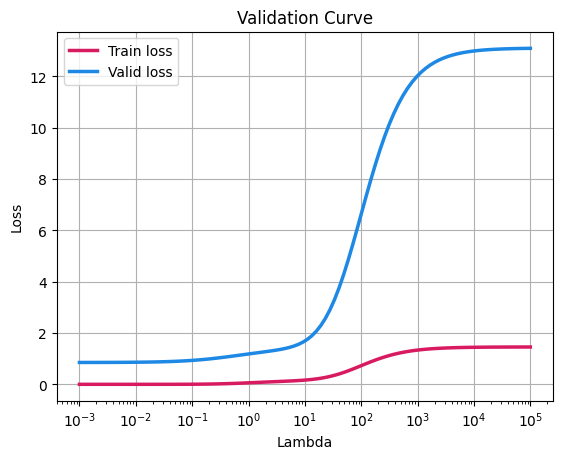

Regularization path


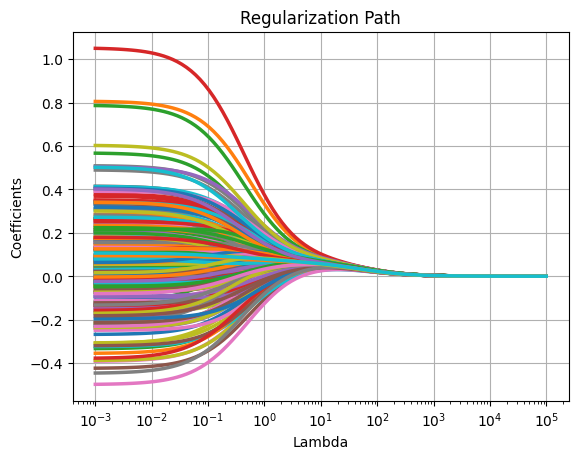

lasso_regression
X_train shape: (40, 200)
y_train shape: (40,)
Validation curve


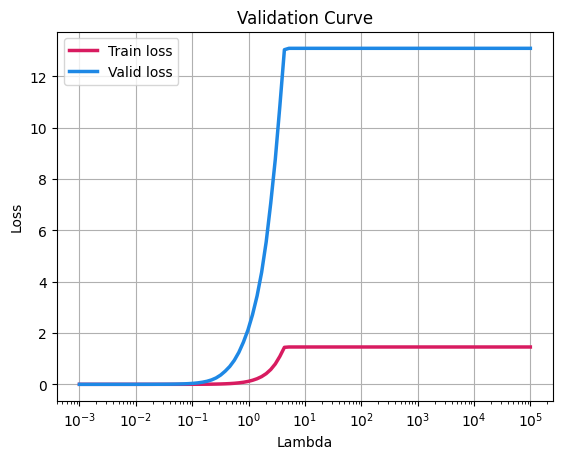

Regularization path


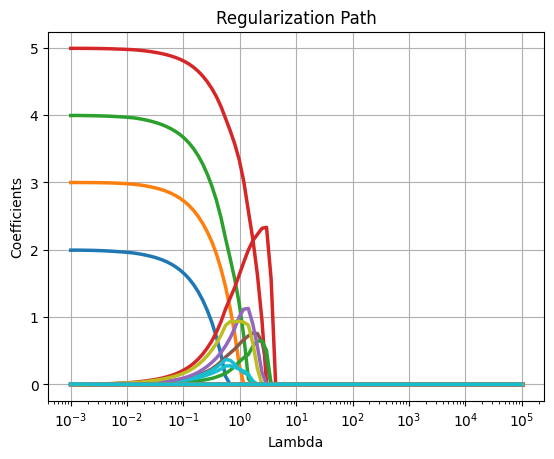

least_squares_regression
X_train shape: (40, 200)
y_train shape: (40,)
Validation curve


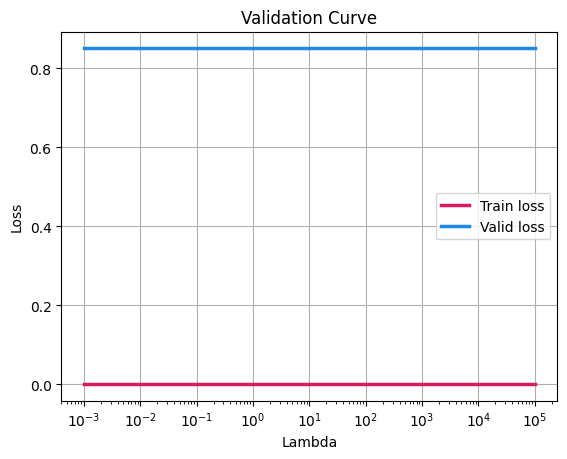

Regularization path


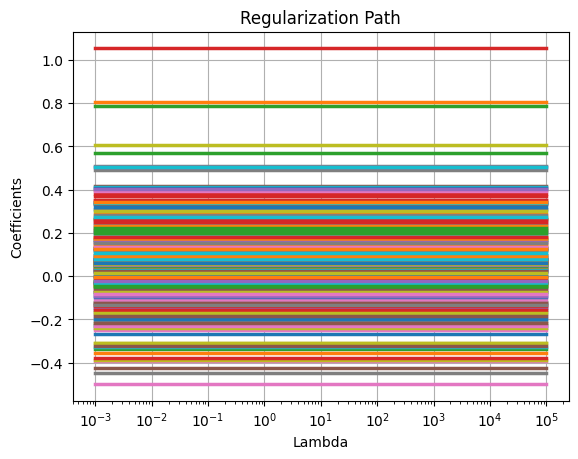

In [30]:
for regression in [ridge_regression, lasso_regression, least_squares_regression]:
    print("==========================")
    print(regression.__name__)
    print("==========================")

    X_train, y_train = load_data("dataset_sparse_train.npy")
    X_train, y_train = shuffle_data(X_train, y_train)
    print(f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}")

    print("Validation curve")
    lambdas = np.logspace(-3, 5, num=100, base=10)
    _, train_losses, val_losses = get_validation_curve_data(
        X_train, y_train, lambdas, regression
    )
    plot_validation_curve(
        lambdas,
        train_losses,
        val_losses,
    )

    print("Regularization path")
    regularization_path = get_regularization_path_data(
        X_train, y_train, lambdas, regression
    )
    plot_regularization_path(lambdas, regularization_path)